**RUN THIS CELL BEFORE DOING ANYTHING ELSE:**

In [ ]:
!pip3 install --upgrade git+https://github.com/ptgodart/nasaPoly.git
%matplotlib inline
import nasaPoly # for thermodynamic functions
from matplotlib import pyplot as plt # for plotting
import numpy as np # for general math stuff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ptgodart/nasaPoly.git to /tmp/pip-req-build-6lzvvsl8
  Running command git clone -q https://github.com/ptgodart/nasaPoly.git /tmp/pip-req-build-6lzvvsl8
  Created wheel for nasaPoly: filename=nasaPoly-0.0.1-py3-none-any.whl size=275528 sha256=5b1c3296991b29795ce4f762b493bfa62056d41db85af9d8fb692354f28590dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-l2i7zt4o/wheels/0d/3b/36/9129e6f4450281e6d729bb6c955067eab00b0c9c63a572818c
Successfully built nasaPoly


# Problem Set 2 - TEMPLATE (Create a copy before editing!)

Thermodynamics and Climate Change

MOSTEC 2022

## Problem 4: Exploring Heat Capacity

## Part a:

(enter solutions below)

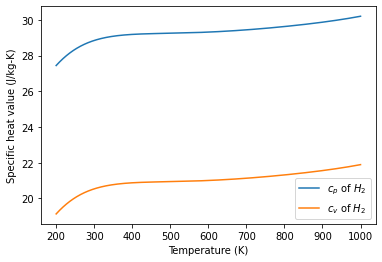

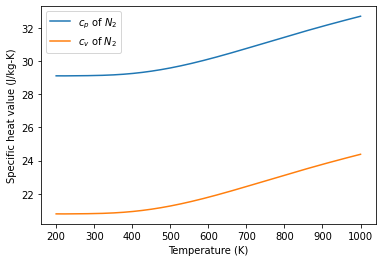

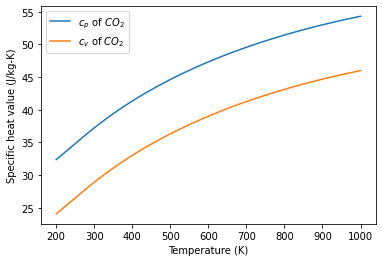

In [ ]:
# Enter solutions below:
R = 8.3145 # J / mol-K
T0 = 200 # K
# nasaPoly.listSpecies()
Hydrogen = nasaPoly.Species('H2')
Nitrogen = nasaPoly.Species('N2')
CO2 = nasaPoly.Species('CO2')
temps = list()
cp_hydrogen = list()
cv_hydrogen = list()
cp_nitrogen = list()
cv_nitrogen = list()
cp_CO2 = list()
cv_CO2 = list()

for i in range(200, 1001):
    temps.append(i)
    cp_hydrogen.append(Hydrogen.cp_0(i))
    cv_hydrogen.append(Hydrogen.cp_0(i) - R)
    cp_nitrogen.append(Nitrogen.cp_0(i))
    cv_nitrogen.append(Nitrogen.cp_0(i) - R)
    cp_CO2.append(CO2.cp_0(i))
    cv_CO2.append(CO2.cp_0(i) - R)

plt.xlabel('Temperature (K)')
plt.ylabel('Specific heat value (J/kg-K)')
plt.plot(temps, cp_hydrogen, label='$c_p$ of $H_2$')
plt.plot(temps, cv_hydrogen, label='$c_v$ of $H_2$')
plt.legend()
plt.show()

plt.xlabel('Temperature (K)')
plt.ylabel('Specific heat value (J/kg-K)')
plt.plot(temps, cp_nitrogen, label='$c_p$ of $N_2$')
plt.plot(temps, cv_nitrogen, label='$c_v$ of $N_2$')
plt.legend()
plt.show()

plt.xlabel('Temperature (K)')
plt.ylabel('Specific heat value (J/kg-K)')
plt.plot(temps, cp_CO2, label='$c_p$ of $CO_2$')
plt.plot(temps, cv_CO2, label='$c_v$ of $CO_2$')
plt.legend()
plt.show()

## Part b:

In [ ]:
# import scipy.integrate as si
from scipy.integrate import quad

# Enter solutions below:
# (hint: you can integrate functions using si.quad(func, lower_bound, upper_bound))

# function to calculate c_v to streamline later integrand

def Hydrogen_cv_0(temp):
  return Hydrogen.cp_0(temp) - R / Hydrogen.molecular_wt

def Nitrogen_cv_0(temp):
  return Nitrogen.cp_0(temp) - R / Nitrogen.molecular_wt

def CO2_cv_0(temp):
  return CO2.cp_0(temp) - R / CO2.molecular_wt

def thermal_energy_cp(start, end, species):
    integral = quad(species.cp_0, start, end)[0]
    return integral

def thermal_energy_hydrogen_cv(start, end, sample):
    integral = quad(Hydrogen_cv_0, start, end)[0]
    return integral

def thermal_energy_nitrogen_cv(start, end, sample):
    integral = quad(Nitrogen_cv_0, start, end)[0]
    return integral

def thermal_energy_CO2_cv(start, end, sample):
    integral = quad(CO2_cv_0, start, end)[0]
    return integral

# Raising the temperature of H2
# i. Constant pressure 
print("Thermal energy required at constant pressure:")
print(f'{thermal_energy_cp(200, 300, Hydrogen)} J/mol of H2 from 200K to 300 K')
print(f'{thermal_energy_cp(200, 300, Nitrogen)} J/mol of N2 from 200K to 300 K')
print(f'{thermal_energy_cp(200, 300, CO2)} J/mol of CO2 from 200K to 300 K')

# ii. Constant volume
print("\nThermal energy required at constant volume:")
print(f'{thermal_energy_hydrogen_cv(200, 300, Hydrogen)} J/mol of H2 from 200K to 300 K')
print(f'{thermal_energy_nitrogen_cv(200, 300, Nitrogen)} J/mol of N2 from 200K to 300 K')
print(f'{thermal_energy_CO2_cv(200, 300, CO2)} J/mol of CO2 from 200K to 300 K')

#iii. 800-900K
print("\nThermal energy required to raise the temperature from 800K to 900K:")
print(f'{thermal_energy_cp(800, 900, Hydrogen)} J/mol of H2 from 800K to 900 K at constant pressure')
print(f'{thermal_energy_cp(800, 900, Nitrogen)} J/mol of N2 from 800K to 900 K at constant pressure')
print(f'{thermal_energy_cp(800, 900, CO2)} J/mol of CO2 from 800K to 900 K at constant pressure')
print(f'{thermal_energy_hydrogen_cv(800, 900, Hydrogen)} J/mol of H2 from 800K to 900 K at constant volume')
print(f'{thermal_energy_nitrogen_cv(800, 900, Nitrogen)} J/mol of N2 from 800K to 900 K at constant volume')
print(f'{thermal_energy_CO2_cv(800, 900, CO2)} J/mol of CO2 from 800K to 900 K at constant volume\n')

print("""Between the two ranges of temperature increase, the energy required to raise the temperature from 800 to 900K 
is always greater than the quantity required for 200K-300K, regardless of constant volume or constant pressure.
This supports a nonlinear function underlying the thermal energy change curve.""")

Thermal energy required at constant pressure:
2828.6394834767184 J/mol of H2 from 200K to 300 K
2911.1630112768407 J/mol of N2 from 200K to 300 K
3481.2588412192426 J/mol of CO2 from 200K to 300 K

Thermal energy required at constant volume:
2416.189337634703 J/mol of H2 from 200K to 300 K
2881.482657390069 J/mol of N2 from 200K to 300 K
3462.366329375209 J/mol of CO2 from 200K to 300 K

Thermal energy required to raise the temperature from 800K to 900K:
2974.5516122488216 J/mol of H2 from 800K to 900 K at constant pressure
3176.5801454992466 J/mol of N2 from 800K to 900 K at constant pressure
5223.864241002098 J/mol of CO2 from 800K to 900 K at constant pressure
2562.1014664068075 J/mol of H2 from 800K to 900 K at constant volume
3146.899791612475 J/mol of N2 from 800K to 900 K at constant volume
5204.971729158065 J/mol of CO2 from 800K to 900 K at constant volume

Between the two ranges of temperature increase, the energy required to raise the temperature from 800 to 900K 
is always 

## Part c:

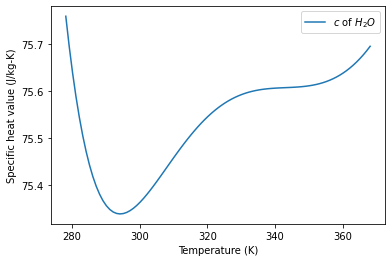

In [ ]:
# Enter solutions below:
T_initial = 5 # C
T_final = 95 # C
temps = list()
c_values = list()
Water = nasaPoly.Species('H2O(L)')
for i in range(T_initial, T_final + 1):
    temps.append(i + 273.15)
    c_values.append(Water.cp_0(i + 273.15))
plt.xlabel('Temperature (K)')
plt.ylabel('Specific heat value (J/kg-K)')
plt.plot(temps,c_values, label='$c$ of $H_2O$')
plt.legend()
plt.show()

## Part d:

In [ ]:
from re import T
# Enter solutions below:

# i. 5 - 10 degrees C
T_start = 5 + 273.15 # K
T_end = 10 + 273.15 # K
print(f'Raising the temperature of water from 5 to 10 degrees C requires {thermal_energy_cp(T_start, T_end,Water)} J/mol of thermal energy.')

# ii. 90 - 95 degrees C
T_start = 90 + 273.15 # K
T_end = 95 + 273.15 # K
print(f'Raising the temperature of water from 90 to 95 degrees C requires {thermal_energy_cp(T_start, T_end,Water)} J/mol of thermal energy.')

Raising the temperature of water from 5 to 10 degrees C requires 378.0953538845816 J/mol of thermal energy.
Raising the temperature of water from 90 to 95 degrees C requires 378.3663546112282 J/mol of thermal energy.


# Problem 5 (Challenge): Adiabatic Flame Temperature

In [ ]:
# Enter solutions below:
STEP = 1
ERROR_MARGIN = 0.05
Carbon = nasaPoly.Species('C')
Oxygen = nasaPoly.Species('O2')
Nitrogen = nasaPoly.Species('N2')
CO2 = nasaPoly.Species('CO2')

# enthalpy of formation streamlining
def h_reactants_air(T):
  return (Carbon.h_0(T) + Oxygen.h_0(T) + 3.77 * Nitrogen.h_0(T)) / 1000 # MJ / kmol

def h_products_air(T):
  return (CO2.h_0(T) + 3.77 * Nitrogen.h_0(T)) / 1000 # MJ / kmol

def h_reactants_O2(T):
  return (Carbon.h_0(T) + Oxygen.h_0(T)) / 1000 # MJ / kmol

def h_products_O2(T):
  return CO2.h_0(T) / 1000 # MJ / kmol

#i. In pure oxygen
temps = list()
enthalpy_r = h_reactants_O2(298)
enthalpy_p = list()
aft = 0
for i in range(298, 20000, STEP): # I used 298 K as T_initial for reference point
    temps.append(i)
    enthalpy_p.append([h_products_O2(i), i])

# now that we have all of the basic calculations done, we can do the comparing
for j in range(len(temps)):
    dEnthalpy = enthalpy_p[j][0] - enthalpy_r
    if (abs(dEnthalpy) < ERROR_MARGIN):
        aft = enthalpy_p[j][1]
        print(f'In pure O2: Initial temp = {298}K, Adiabatic flame temp = {aft}K, The enthalpy error is {abs(dEnthalpy)} MJ/kmol')
        break

#ii. In air
temps = list()
enthalpy_r = h_reactants_air(298)
enthalpy_p = list()
aft = 0
for i in range(298, 20000, STEP): # I used 298 K as T_initial for reference point
    temps.append(i)
    enthalpy_p.append([h_products_air(i), i])

# now that we have all of the basic calculations done, we can do the comparing
for j in range(len(temps)):
    dEnthalpy = enthalpy_p[j][0] - enthalpy_r
    if (abs(dEnthalpy) < ERROR_MARGIN):
        aft = enthalpy_p[j][1]
        print(f'In air: Initial temp = {298}K, Adiabatic flame temp = {aft}K, The enthalpy error is {abs(dEnthalpy)} MJ/kmol\n')
        break

#iii. Compare
print("""Part iii.\nGiven an initial temperature benchmark, such as 298K, the adiabatic flame temperature in pure oxygen is 
higher than that in air, since in a system with air as a reactant will contain other gases such as nitrogen (N2). 
These other gases will require portions of the generated heat to increase its temperature, so part of the energy 
will go into heating these other gases.""")

In pure O2: Initial temp = 298K, Adiabatic flame temp = 15325K, The enthalpy error is 0.018933902204821607 MJ/kmol
In air: Initial temp = 298K, Adiabatic flame temp = 5948K, The enthalpy error is 0.022513132338417563 MJ/kmol

Part iii.
Given an initial temperature benchmark, such as 298K, the adiabatic flame temperature in pure oxygen is 
higher than that in air, since in a system with air as a reactant will contain other gases such as nitrogen (N2). 
These other gases will require portions of the generated heat to increase its temperature, so part of the energy 
will go into heating these other gases.
